In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openai_client import OpenAIClient
from IPython.core.interactiveshell import InteractiveShell

In [2]:
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
products_json = json.load(open('data/final_products_data.json'))

In [4]:
products_df = pd.DataFrame(products_json["products"][0].items(), columns=["id", "raw_data"])
products_df["raw_length"] = products_df["raw_data"].apply(lambda x: len(x.split()))

In [5]:
products_df.tail(3)

,id,raw_data,raw_length
4124,WAFER-ULT5-i3-R10,w w w e w r l c Single Board Computer Embedded Board SBC supports Intel th Generation Whiskey Lake processor DDR SODIMM Triple display dual HDMI LVDS Triple GbE USB Gen M A key mPCIe mSATA support SATA Gbs COM RoHS SoC th generation Intel mobile ULT Processor Intel Core iUE GHz GHz Quadcore MB cache TDPW Intel Core iUE GHz GHz Quadcore MB cache TDPW Intel Core iUE GHz GHz Dualcore MB cache TDPW Intel Celeron processor UE GHz Dualcore MB cache TDPW Intel Celeron processor U GHz Dualcore MB cache TDPW BIOS AMI UEFI BIOS Memory x DDR MHz SODIMM support GB Graphics Engine Intel UHD Graphics Display Output Triple Independent Displays x HDMI xHz x LVDS bit dualchannel LVDS CHB DP LVDS converter xHz Ethernet x Intel IAT colay I x PCIe GbE LAN Intel Controller Embedded Controller ITE ITVGFX External IO Interface x USB Gen Internal IO Interface x RS x pin P x RS x pin P Support Auto Flow Control RS x SATA Gs V SATA power connector x USB x pin P IC x IC x pin Audio x HD audio x pin support channel HD audio ACKITHDR Front Panel x Power LED HDD LED x pin x Power button x pin x Reset button x pin LAN LED x LAN LED x pin Expansion x Fullsize PCIe Mini slot w SATA signal support mSATA x M slot A Key Digital IO x bit digital IO x pin Fan Connector x Smart fan connector x pin Power Supply V DC input x Internal power connector x pin Support ATATX mode Watchdog Timer Software programmable support sec system reset Power Consumption VA Intel Core iUE GHz CPU GB MHz DDR memory Operating Temperature C C Storage Temperature C C Operating Humidity noncondensing Dimensions mm x mm Weight GW g NW g Specifications Ordering Information Part No Description WAFERULTiR SBC supports Intel th Generation Core iUE DDR SODIMM triple display dual HDMI LVDS Triple GbE USB M A key mPCIe mSATA support SATA Gbs COM RoHS WAFERULTiR SBC supports Intel th Generation Core iUE DDR SODIMM triple display dual HDMI LVDS Triple GbE USB M A key mPCIe mSATA support SATA Gbs COM RoHS WAFERULTiR SBC supports Intel th Generation Core iUE DDR SODIMM triple display dual HDMI LVDS Triple GbE USB M A key mPCIe mSATA support SATA Gbs COM RoHS WAFERULTCR SBC supports Intel th Generation Celeron UE DDR SODIMM triple display dual HDMI LVDS Triple GbE USB M A key mPCIe support SATA Gbs COM RoHS WAFERULTCER SBC supports Intel th Generation Celeron U DDR SODIMM triple display dual HDMI LVDS Triple GbE USB M A key mPCIe support SATA Gbs COM RoHS RS Round cable RS RS cable mm AWG A DSUB P MALEHEXAGONAL screw B MOLEX P Wins Precision RoHS RS SATA cable mm AWG SATA P female SATA P female LOCK JST PHR P one pcs PKG w label Wins Precision RoHS By order production MOQ Packing List x WAFERULT single board computer Heatspreader x Power cable x SATA power cable kit x RS cable x QIG Quick Installation Guide WAFERULT WAFERULTV SBC supports Intel th generation Whiskey Lake processor DDR SODIMMs Triple display dual HDMI LVDS selection M A Key PCIe Mini slot mSATA spport COM USB Gen SATA Gbs support Support temperature operation C C Support Auto Flow Control RS Features USB USBUSB SATA Gbs DDR PCIe GbEJumperless x USB Gen HDMI x LAN DDR MHz M A Key RS DIO SATAPCIe MiniUSB Audio RS Dimensions Unit mm LVDS Smart Home Fanless heatsink module Optional PN RS Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information IEI WAFERULTCER WAFERULTiR WAFERULTiR WAFERULTiR httpswwwmousercomiei httpswwwmousercomaccesspnWAFERULTCER httpswwwmousercomaccesspnWAFERULTiR httpswwwmousercomaccesspnWAFERULTiR httpswwwmousercomaccesspnWAFERULTiR,622
4125,WAFER-ULT5-i7-R10,w w w e w r l c Single Board Computer Embedded Board SBC supports Intel th Generation Whiskey Lake processor DDR SODIMM Triple display dual HDMI LVDS Triple GbE USB Gen M A key mPCIe mSATA support SATA Gbs COM RoHS SoC th generation Intel mobile ULT Processor Intel Core iUE GHz GHz Quadcore MB cache TDPW Intel Core iUE GHz GHz Quadcore MB cache TDPW Intel Core iUE GHz GHz Du

In [6]:
# create a distribution of the raw data length
products_df["raw_length"].describe()

count     4127.00
mean      2543.96
std      16013.38
min          0.00
25%        558.00
50%        756.00
75%       1153.00
max     493591.00
Name: raw_length, dtype: float64

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Raw Data Length')

<Axes: title={'center': 'Distribution of Raw Data Length'}, xlabel='raw_length', ylabel='Count'>

Text(0.5, 0, 'Raw Data Length')

Text(0, 0.5, 'Count')

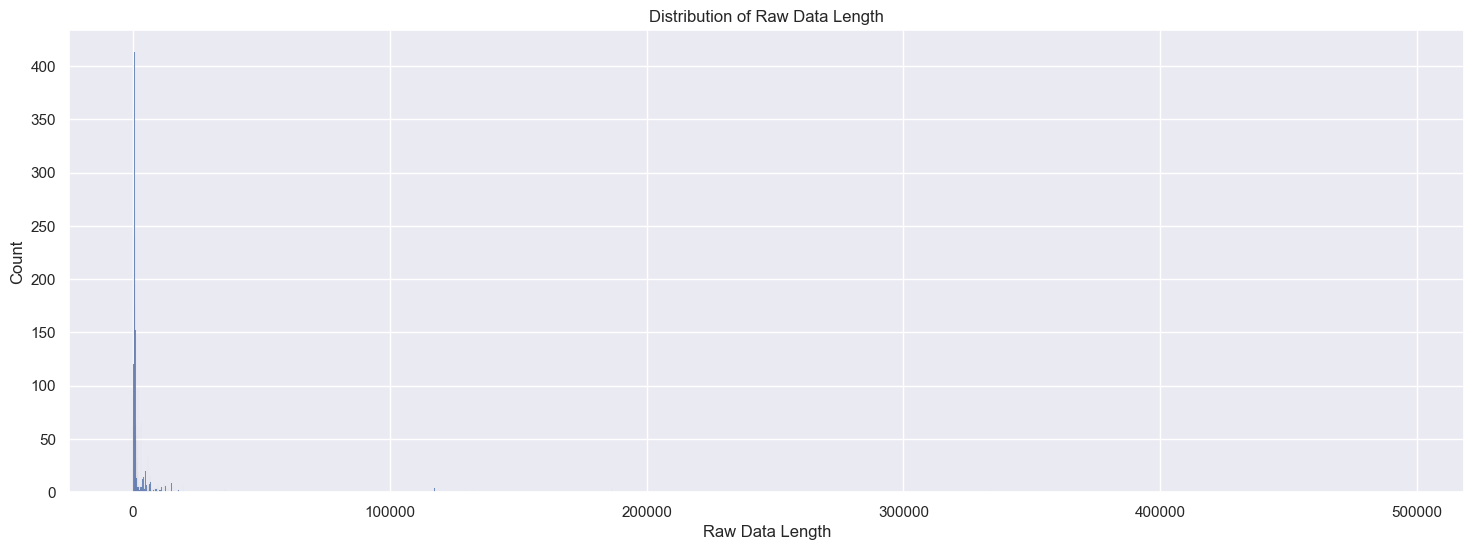

In [7]:
plt.figure(figsize=(18, 6))  # Increase width and height
plt.title("Distribution of Raw Data Length")  # Add a title
sns.histplot(products_df["raw_length"], edgecolor='black')  # Use histplot instead of displot
plt.xlabel("Raw Data Length")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.show()

In [8]:
products_df[products_df["raw_length"] < 250].shape
products_df[products_df["raw_length"] < 250].tail(3)

(172, 3)

,id,raw_data,raw_length
4028,SB02-4940-0000-C1,DatasheetUDOO XII Main cloud services UDOO BRICKS UDOO BLU Arduino Leonardocompatible II II LEONARDO BIT Optional Depends version Development platform ARDUINO LEONARDOCOMPATIBLEII GB DDRL DUAL CHANNEL Gigabit Ethernet LAN interface M Key E slot optional Wireless modules x HDMI x mini DP RC IR interface mm x mm inch x inch Intel HD Graphics Up MHz execution units NETWORKING USB SATA connector M Key B SSD Slot Micro SD card slot VIDEO INTERFACE GRAPHICS MULTIMEDIA AUDIO IR OTHER INTERFACES OPERATING SYSTEM DIMENSIONS PROCESSOR CORES MEMORY FEATURES Arduino Leonardo Microcontroller GHZ INTEL PENTIUM N UDOO X UDOO X GHZ INTEL CELERON N GB DDRL DUAL CHANNEL GB GB MASS STORAGE Intel HD Graphics Up MHz execution units HD audio codec ALC CG MicrophoneHeadphone combo connector Preamplified speaker output SPDIF output HW Video decode HHEVC H MPEG MVC VC WMV JPEG VP VP HW Video encode H MVC JPEG Up GPIOs x IC x UART LPC SDIO Touch Screen signals external pin headers The communication Braswell SoC ATmegaU Microcontroller goes internal USB interface like Arduino Leonardo boards connect external PCs V compliant x USB typeA sockets ATmegaU UART x iC x SPI Arduino Leonardocompatible Up x digital IO PWM x Analog input Microcontroller Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information UDOO SBC SBC SBC SBC httpswwwmousercomudoo httpswwwmousercomaccesspnSBC httpswwwmousercomaccesspnSBC httpswwwmousercomaccesspnSBC httpswwwmousercomaccesspnSBC,222
4035,SC0563,Allegro ZHeight ZHeight ZHeight ZHeight ZHeight Z He ig ht Z He ig ht Z He ig ht Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information Raspberry Pi SC httpswwwmousercomraspberrypi httpswwwmousercomaccesspnSC,34
4062,uATX-RYZEN,uATXSeriesDatasheetindd Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information GIGAIPC uATXRYZEN httpswwwmousercomgigaipc httpswwwmousercomaccesspnuATXRYZEN,16


In [9]:
products_df[products_df["raw_length"] > 100000].shape

(17, 3)

In [10]:
products_df = products_df[products_df["raw_length"] > 250]
products_df = products_df[products_df["raw_length"] < 100000]

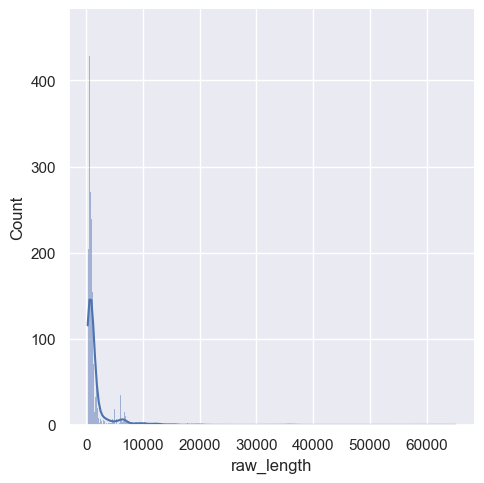

In [11]:
sns.displot(products_df["raw_length"], kde=True)

In [12]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3938 entries, 0 to 4126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3938 non-null   object
 1   raw_data    3938 non-null   object
 2   raw_length  3938 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 123.1+ KB


In [13]:
# sort products by raw data length
products_df = products_df.sort_values(by="raw_length", ascending=False)

In [14]:
client = OpenAIClient()

In [15]:
print(products_df.head(5)["raw_data"].values[0])
print(products_df.head(5)["raw_length"])

LAN Data Sheet LAN SuperSpeed USB Gen Ethernet Controller Highlights Single Chip SuperSpeed SS USB Gen Ethernet Controller Integrated Gigabit PHY HP AutoMDIX Integrated Ethernet MAC FullDuplex Support Integrated USB Gen SS Device Con troller PHY Low Power Consumption Compliant Energy Efficient Ethernet IEEE az Wake LAN support WoL Configuration via One Time Programmable OTP Memory NetDetach provides automatic USB attachdetach Ethernet cable connectedremoved Target Applications Automotive Infotainment NotebookTablet Docking Stations Detachable Laptops USB Port Replicators Standalone USB Ethernet Dongles Embedded Systems CE Devices SetTop Boxes Video Recorders Test Instrumentation Industrial System Considerations Power IOs Multiple power management features GPIOs Supports bus selfpowered operation Variable voltage IO supply VV Software Support Windows drivers Microsoft Certified Linux driver OS X macOS driver uBoot support UEFI support PXE support FreeBSD support Windows OTPEEPROM progra

In [16]:
result = client.extract_data(products_df.head(5)["raw_data"].values[0])
result

'{\n    "name": "LAN SuperSpeed USB Gen Ethernet Controller",\n    "size": "Not available",\n    "form": "Not available",\n    "processor": "Not available",\n    "core": "Not available",\n    "frequency": "Not available",\n    "memory": "Not available",\n    "voltage": "Not available",\n    "io": "Not available",\n    "thermal": "Not available",\n    "feature": "Single Chip SuperSpeed SS USB Gen Ethernet Controller, Integrated Gigabit PHY, HP Auto-MDIX, Integrated Ethernet MAC, Full-Duplex Support, Integrated USB Gen SS Device Controller PHY, Low Power Consumption, Compliant with Energy Efficient Ethernet IEEE 802.3az, Wake on LAN support (WoL), Configuration via One Time Programmable (OTP) Memory, NetDetach provides automatic USB attach/detach when Ethernet cable is connected/removed",\n    "type": "Ethernet Controller",\n    "specification": "Not available",\n    "manufacturer": "Microchip Technology Inc.",\n    "location": "Not available",\n    "description": "The LAN SuperSpeed USB

In [17]:
x = result.replace("```", "").replace("json", "").replace("\n", "").strip()
x

'{    "name": "LAN SuperSpeed USB Gen Ethernet Controller",    "size": "Not available",    "form": "Not available",    "processor": "Not available",    "core": "Not available",    "frequency": "Not available",    "memory": "Not available",    "voltage": "Not available",    "io": "Not available",    "thermal": "Not available",    "feature": "Single Chip SuperSpeed SS USB Gen Ethernet Controller, Integrated Gigabit PHY, HP Auto-MDIX, Integrated Ethernet MAC, Full-Duplex Support, Integrated USB Gen SS Device Controller PHY, Low Power Consumption, Compliant with Energy Efficient Ethernet IEEE 802.3az, Wake on LAN support (WoL), Configuration via One Time Programmable (OTP) Memory, NetDetach provides automatic USB attach/detach when Ethernet cable is connected/removed",    "type": "Ethernet Controller",    "specification": "Not available",    "manufacturer": "Microchip Technology Inc.",    "location": "Not available",    "description": "The LAN SuperSpeed USB Gen Ethernet Controller is a hi

In [18]:
parsed_result = json.loads(x)
parsed_result

{'name': 'LAN SuperSpeed USB Gen Ethernet Controller',
 'size': 'Not available',
 'form': 'Not available',
 'processor': 'Not available',
 'core': 'Not available',
 'frequency': 'Not available',
 'memory': 'Not available',
 'voltage': 'Not available',
 'io': 'Not available',
 'thermal': 'Not available',
 'feature': 'Single Chip SuperSpeed SS USB Gen Ethernet Controller, Integrated Gigabit PHY, HP Auto-MDIX, Integrated Ethernet MAC, Full-Duplex Support, Integrated USB Gen SS Device Controller PHY, Low Power Consumption, Compliant with Energy Efficient Ethernet IEEE 802.3az, Wake on LAN support (WoL), Configuration via One Time Programmable (OTP) Memory, NetDetach provides automatic USB attach/detach when Ethernet cable is connected/removed',
 'type': 'Ethernet Controller',
 'specification': 'Not available',
 'manufacturer': 'Microchip Technology Inc.',
 'location': 'Not available',
 'description': 'The LAN SuperSpeed USB Gen Ethernet Controller is a high-performance, cost-effective solu

In [32]:
# randomly select 100 products from products_df
products = products_df.sample(100, random_state=42)
products.head(1)

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

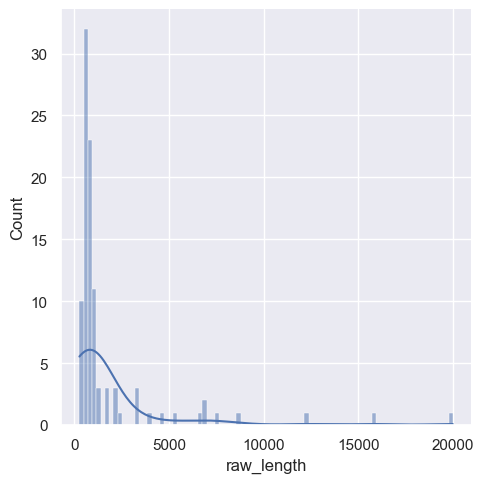

In [33]:
sns.displot(products["raw_length"], kde=True)

In [35]:
extracted_data = []
raw_extracted_data = []

for header, subheader in products[["id", "raw_data"]].values:
    result = client.extract_data(subheader)
    x = result.replace("```", "").replace("json", "").replace("\n", "").strip()
    try:
        parsed_result = json.loads(x)
        parsed_result["id"] = header
        extracted_data.append(parsed_result)
    except:
        raw_extracted_data.append(result)

# extracted_data

In [39]:
len(extracted_data)
len(raw_extracted_data)

99

1

In [40]:
raw_extracted_data

['```json\n{\n    "name": "Advantech AIMB-275G2-00A1E",\n    "size": "170 x 170 mm",\n    "form": "Mini-ITX",\n    "processor": "Intel Core i5-4300U, Intel Core i3-4010U, Intel Celeron 2980U",\n    "core": "Dual core",\n    "frequency": "1.9 GHz, 1.7 GHz, 1.6 GHz",\n    "memory": "Dual Channel DDR3L 1600 MHz, Max Capacity 16 GB (8 GB per SODIMM), 2 x 204-pin SODIMM, Non-ECC",\n    "voltage": "Single voltage 12V DC input",\n    "io": "Multiple display I/O supports versatile Tri display functions (eDP/LVDS, DP/HDMI, DP), Realtek ALC892 supports 5.1 channel HD audio, Dual Realtek RTL8111E Gigabit LAN, Full-sized MiniPCIe, Half-sized MiniPCIe, 6 x COM, 2 x SATA III, 1 x mSATA, 4 x USB 3.0, 6 x USB 2.0",\n    "thermal": "Fanless Heat Sink, Fan Cooler, Heat Pipe Cooling Module",\n    "feature": "Supports Intel Core i5/i3/Celeron ULT processors, Multiple display I/O, Dual Realtek Gigabit LAN, Full-sized and Half-sized MiniPCIe slots, Wide range of I/O interfaces",\n    "type": "Industrial Mot

In [36]:
extracted_data_df = pd.DataFrame(extracted_data)
extracted_data_df.head(1)

,name,size,form,processor,core,frequency,memory,voltage,io,thermal,feature,type,specification,manufacturer,location,description,summary,id
0,SMARCsXEL E,82 x 50 mm,SMARC module,"Intel Atom, Pentium, Celeron series",Up to 4 cores,Up to 3.0 GHz,Up to 8 GByte LPDDR4 memory with in-band ECC support,5V wide-range input,"4x USB, 2x USB 2.0, 2x SATA, 2x LAN, PCIe, HDMI, DP, LVDS, eDP, serial interfaces, HD Audio, I2S, I2C, SPI, GPIOs","Industrial temperature grade versions available, passive cooling options","TSN support, Trusted Platform Module (TPM), Industrial Temperature Grade versions",Single Board Computers,"Supports Intel Atom, Pentium, Celeron processors, up to 8 GByte LPDDR4 memory, multiple I/O interfaces, industrial temperature range, TPM, TSN support",Kontron,"Kontron Europe GmbH, Gutenbergstraße, Ismaning, Germany","The SMARCsXEL E is a SMARC module featuring the latest generation Intel Atom, Pentium, and Celeron processors, designed for industrial applications with support for in-band ECC memory, multiple I/O interfaces, and industrial temperature ranges.","SMARCsXEL E is a high-performance SMARC module with Intel Atom, Pentium, and Celeron processors, offering robust industrial features and extensive I/O support.",51017-0832-R2-4


In [37]:
products = products.merge(extracted_data_df, on="id", how="left")
products.head(1)

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [38]:
products.to_csv("data/clean_products.csv", index=False)